<left>
<table style="margin-top:0px; margin-left:0px;">
<tr>
  <td><img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/style/worm.png" alt="WORM" title="WORM" width=50/></td>
  <td><h1 style=font-size:30px>Acid Mine Drainage Bioremediation</h1><h2>Breakout Session Activity</h2></td>
</tr>
</table>
</left>


<td><img src="https://i0.wp.com/undergroundminers.com/wp-content/uploads/2022/08/DSC01156-1.jpg?resize=1200%2C900&ssl=1" alt="Coalbrook Mine" title="Coalbrook Mine" width=50%/></td>

*Coalbrook coal mine, Pennsylvania, USA in the early 20th century. Historic photo from the Underground Mining Archive.*

A consequence of mining activities is the exposure of metal sulfide minerals (like pyrite) to air and water. This provides an opportunity for acidophilic ("acid-loving") microbes to oxidize exposed sulfide minerals into sulfuric acid. Metals that were previously trapped in rocks become mobile in the resulting acidic runoff. Acidic water and high concentrations of toxic metals is harmful to the environment and aquatic habitats in particular. Mines can continue to generate polluted water long long after they have been abandoned, as is the case with Coalbrook coal mine in Pennsylvania, USA (pictured above).

One strategy to combat pollution from acid mine drainage (AMD) is to stimulate the metabolisms of sulfate reducers present in the system. Because microbes are involved in this remediation strategy, it is called "bioremediation". Sulfate reducers remove sulfate and harmful dissolved metals from the water by precipitating them back into metal sulfide minerals. Organic molecules can serve as electron donors. For example, acetic acid, $\text{CH}_3\text{COOH}_{(aq)}$, can be added to AMD to promote this reaction:

$$\text{SO}_4^{2-} + \text{CH}_3\text{COOH}_{(aq)} + \text{Zn}^{2+} = 2\text{CO}_{2(aq)} + \text{ZnS}_{(cr)} + 2\text{H}_2\text{O}$$

We can use the mineral sphalerite to represent ZnS.

---

### Activity: bioremediation

You are given the task of remediating AMD from the abandoned Coalbrook Mine. Water chemistry data for this sample are found in the CSV file `AMD_aceticacid.csv`. There are 13 rows in the CSV file. All rows are duplicates except for the "acetic-acid" column. Input concentrations of acetic acid range from 1E-10 to 1E-3 molal.

1) Calculate energy supplied by the bioremediation reaction in Coalbrook mine AMD at varying concentrations of acetic acid. How can the results inform which concentrations of acetic acid to aim for when remediating the AMD?

2) A doctoral dissertation study by Zdyb (1999) found that using lactic acid as a carbon source was more efficient than acetate for remediating AMD (see review by [Anekwe & Isa, 2023](https://doi.org/10.1016/j.aej.2022.09.053)). Calculate energy supply when lactic acid is used to remediate Coalbrook AMD instead of acetic acid. Assume lactic acid is being oxidized to $\text{CO}_2$ to reduce sulfate to sphalerite.

In [1]:
import AqEquil

### Note to facilitators:

Introduce this new parameter to participants called `exclude_organics_except`, used below. This allows the user to provide a list of organics that they want involved in the speciation while suppressing all others.

Excepted organics will also include all protonation states and complexes. So excepting "acetate" will allow acetate, acetic-acid, and acetate complexes to appear in the speciation while suppressing all other organics.

In [2]:
ae = AqEquil.AqEquil(exclude_organics_except=["acetate"])

Loading Water-Organic-Rock-Microbe (WORM) thermodynamic databases...
Excluding 726 different chemical species from column 'name' in wrm_data.csv
wrm_data.csv is now set as the active thermodynamic database.
This database is meant for calculations between 0 and 1000 °C and up to 5 kb pressure.
Element database elements.csv is active.
Solid solution database solid_solutions.csv is active.
LogK database wrm_data_logk.csv is active.
Excluding 726 different chemical species from column 'name' in wrm_data_logk.csv
LogK_S database wrm_data_logk_s.csv is active.
Excluding 726 different chemical species from column 'name' in wrm_data_logk_s.csv


In [3]:
speciation = ae.speciate(input_filename="AMD_aceticacid.csv",
                         redox_flag="Eh")

Getting wrm_data.csv ready. This will take a moment...
Using wrm_data.csv to speciate Coalbrook Mine 1
Using wrm_data.csv to speciate Coalbrook Mine 2
Using wrm_data.csv to speciate Coalbrook Mine 3
Using wrm_data.csv to speciate Coalbrook Mine 4
Using wrm_data.csv to speciate Coalbrook Mine 5
Using wrm_data.csv to speciate Coalbrook Mine 6
Using wrm_data.csv to speciate Coalbrook Mine 7
Using wrm_data.csv to speciate Coalbrook Mine 8
Using wrm_data.csv to speciate Coalbrook Mine 9
Using wrm_data.csv to speciate Coalbrook Mine 10
Using wrm_data.csv to speciate Coalbrook Mine 11
Using wrm_data.csv to speciate Coalbrook Mine 12
Using wrm_data.csv to speciate Coalbrook Mine 13
Using wrm_data.csv to speciate Coalbrook Mine 14
Finished!


In [4]:
speciation.save("Coalbrook_AMD_aceticacid")

Saved as 'Coalbrook_AMD_aceticacid.speciation'


### The notebook can be restarted from here if necessary

In [5]:
import AqEquil
ae = AqEquil.AqEquil(exclude_organics_except=["acetate"])
speciation = AqEquil.load("Coalbrook_AMD_aceticacid.speciation")

Loading Water-Organic-Rock-Microbe (WORM) thermodynamic databases...
Excluding 726 different chemical species from column 'name' in wrm_data.csv
wrm_data.csv is now set as the active thermodynamic database.
This database is meant for calculations between 0 and 1000 °C and up to 5 kb pressure.
Element database elements.csv is active.
Solid solution database solid_solutions.csv is active.
LogK database wrm_data_logk.csv is active.
Excluding 726 different chemical species from column 'name' in wrm_data_logk.csv
LogK_S database wrm_data_logk_s.csv is active.
Excluding 726 different chemical species from column 'name' in wrm_data_logk_s.csv
Loaded 'Coalbrook_AMD_aceticacid.speciation'


In [6]:
speciation.calculate_energy(
        y_type="E",
        y_units="cal",
        species = ["SO4-2", "acetic-acid", "Zn+2", "CO2", "sphalerite", "H2O"],
        stoich = [-1, -1, -1, 2, 1, 2],
        rxn_name="acetic-acid")

Sample,acetic-acid energy supply,acetic-acid limiting reactant
,cal/kg fluid,limiting reactant
Coalbrook Mine 1,0.000003,acetic-acid
Coalbrook Mine 2,0.000036,acetic-acid
Coalbrook Mine 3,0.000383,acetic-acid
Coalbrook Mine 4,0.002005,acetic-acid
Coalbrook Mine 5,0.004088,acetic-acid
Coalbrook Mine 6,0.010478,acetic-acid
Coalbrook Mine 7,0.014801,acetic-acid
Coalbrook Mine 8,0.017307,Zn+2
Coalbrook Mine 9,0.017491,Zn+2


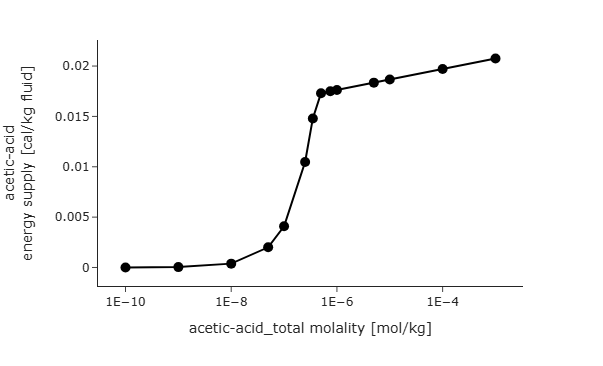

In [9]:
speciation.scatterplot(x="acetic-acid_total",
                       y="acetic-acid energy supply",
                       lineplot=True,
                       log_x=True,
                       rxns_as_labels=False, # good to do when there is no legend
                       plot_width=5)

### Answer Guide for Facilitators

Increasing concentrations of acetic acid increase the energy supplied by the bioremediation reaction. However, there is a point around 1 mmol acetic acid where increasing acetic acid concentrations is estimated to yield diminishing returns. Let the participants think about why this is (the limiting reactant switches from acetic acid to Zn+2 at around this point).

If these results track with energy supply experienced by sulfate reducers, then there may be a maximum effective organic acid concentration where Zn+2 (or other metals) become limiting. There is also likely a minimum acetic acid concentration necessary to stimulate remediation by sulfate reducers.

### Data sources:

Water chemistry data for Coalbrook mine AMD come from [Cravotta III (2008)](https://doi.org/10.1016/j.apgeochem.2007.10.011).

End of demo.